In [1]:
import numpy
from matplotlib import pyplot, cm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Variable declerations
nx = 41
ny = 41
nt = 120
c = 1
dx = 2/ (nx - 1)
dy = 2/ (ny - 1)
sigma = 0.0009
nu = 0.01
dt = sigma *dx*dy/nu

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
comb = numpy.ones((ny, nx))

#Initialization of hat function wrt to u and v
u[int(0.5/dy):int(1/dy + 1),int(0.5/dx):int(1/dx + 1)] = 2
u[int(0.5/dy):int(1/dy + 1),int(0.5/dx):int(1/dx + 1)] = 2

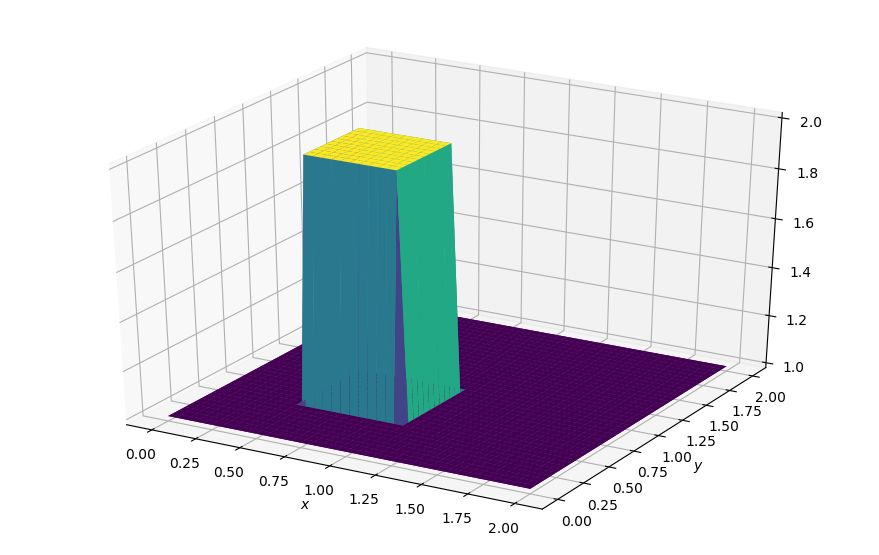

In [4]:
#(plot ICs)
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [6]:
for n in range(nt+1):
    un = u.copy()
    vn = v.copy()
    
    u[1:-1,1:-1] = un[1:-1,1:-1] - \
                    (dt/dx)*un[1:-1,1:-1]*(un[1:-1,1:-1] - un[1:-1,0:-2]) - \
                    (dt/dy)*vn[1:-1,1:-1]*(un[1:-1,1:-1] - un[0:-2,1:-1]) + \
                    nu * (dt/dx**2)*(un[1:-1,2:] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) + \
                    nu * (dt/dy**2)*(un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1])

    v[1:-1,1:-1] = vn[1:-1,1:-1] - \
                    (dt/dx)*un[1:-1,1:-1]*(vn[1:-1,1:-1] - vn[1:-1,0:-2]) - \
                    (dt/dy)*vn[1:-1,1:-1]*(vn[1:-1,1:-1] - vn[0:-2,1:-1]) + \
                    nu * (dt/dx**2)*(vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[0:-2,1:-1]) + \
                    nu * (dt/dy**2)*(vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[0:-2,1:-1])

    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

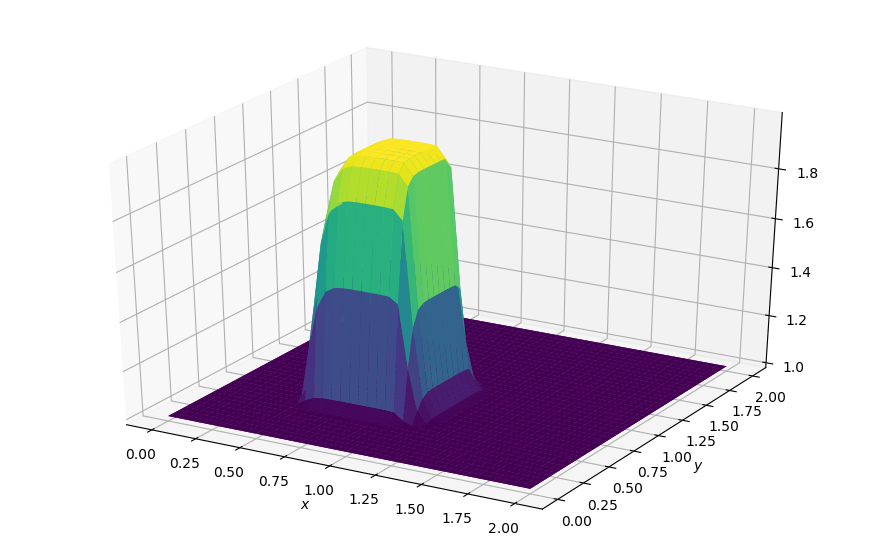

In [9]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection = '3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');